# **Import Libarary**

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt

# **EDA**

In [2]:
df = pd.read_excel('D:\zzKoding\Data Sains - Machine Learning - AI\Lomba\Satria Data 2020\Data\Salinan Data Latih BDC.xlsx')
df_judul = df['judul']
df_narasi = df['narasi']
df_label = df['label']
df.head(10)

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
5,736,1,2020-06-17 00:00:00,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma...",736.png
6,1161,1,2020-05-05 00:00:00,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png
7,1597,1,2020-03-24 00:00:00,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png
8,2098,1,2020-01-09 00:00:00,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...,2098.jpg
9,2226,1,2019-12-24 00:00:00,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,2226.png


In [3]:
df.shape
df = df.drop(['tanggal', 'nama file gambar'], axis=1)
df.head(10)

,ID,label,judul,narasi
0,71,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...
1,461,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2,495,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...
3,550,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k..."
4,681,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .
5,736,1,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma..."
6,1161,1,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...
7,1597,1,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...
8,2098,1,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...
9,2226,1,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      4231 non-null   int64 
 1   label   4231 non-null   int64 
 2   judul   4231 non-null   object
 3   narasi  4231 non-null   object
dtypes: int64(2), object(2)
memory usage: 132.3+ KB


In [5]:
df['label'].value_counts()

1    3465
0     766
Name: label, dtype: int64

In [6]:
df['total']=df['judul'] + ' ' + df['narasi']
df.head()

,ID,label,judul,narasi,total
0,71,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,461,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,Instruksi Gubernur Jateng tentang penilangan ...
2,495,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
3,550,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...","ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,681,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,Foto Kadrun kalo lihat foto ini panas dingin K...


In [7]:
df_t = pd.read_excel('D:\zzKoding\Data Sains - Machine Learning - AI\Lomba\Satria Data 2020\Data\Data Uji BDC.xlsx')
df_t_judul = df_t['judul']
df_t_narasi = df_t['narasi']
df_t_label = df_t['label']
df_t.head()

,ID,tanggal,judul,narasi,nama file gambar,label
0,238057,2020-07-13 00:00:00,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,238057.jpg,1
1,238158,2020-07-06 00:00:00,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,238158.jpg,1
2,238865,2020-04-22 00:00:00,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,238865.jpg,1
3,248298,2019-10-22 00:00:00,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,248298.jpg,1
4,255176,2020-05-01 00:00:00,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",255176.jpg,1


In [8]:
df_t['total']=df_t['judul'] + ' ' + df_t['narasi']
df_t = df_t.drop(['tanggal', 'nama file gambar'], axis=1)
df_t.head()

,ID,judul,narasi,label,total
0,238057,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,1,Narasi Tito Karnavian Berideologi Komunis Kare...
1,238158,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,1,Anies: Seberat beratnya Pekerjaan Akan terasa ...
2,238865,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,1,Hindu di india Melemparkan Patung Buatan Merek...
3,248298,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,1,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...
4,255176,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",1,Permohonan Kelonggaran Angsuran ke OJK Untuk s...


# **Data Preprocessing**

In [9]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


1. Stopwords Indonesia

In [10]:
from nltk.corpus import stopwords
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
stop_words = list_stopwords

2. preprocessing data training dan testing

In [11]:
#preprocessing data training
for index, row in df.iterrows():
    filter_sentence = ''
    sentence = row['total']
    # Cleaning dengan regular expression
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Menghilangkan stopwords
    words = [w for w in words if not w in stop_words]
    # Lower case
    for words in words:
        filter_sentence = filter_sentence  + ' ' + words.lower()
    
    df.loc[index, 'total'] = filter_sentence

#preprocessing data testing    
for index, row in df_t.iterrows():
    filter_sentence = ''
    sentence = row['total']
    # Cleaning dengan regular expression
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Menghilangkan stopwords
    words = [w for w in words if not w in stop_words]
    # Lower case
    for words in words:
        filter_sentence = filter_sentence  + ' ' + words.lower()
    
    df_t.loc[index, 'total'] = filter_sentence

3. Hasil Preprocessing Data Training

In [12]:
df.head(10)

,ID,label,judul,narasi,total
0,71,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,pemakaian masker menyebabkan penyakit legionn...
1,461,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,instruksi gubernur jateng penilangan yg berma...
2,495,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,foto jim rohn jokowi presiden terbaik dlm sej...
3,550,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",politik kenyataan pak jokowi berhasil memulan...
4,681,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,foto kadrun kalo lihat foto panas dingin kadr...
5,736,1,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma...",event promo smartphone jne 2020 spesial juni ...
6,1161,1,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,mereka sudah mempersiapkan diri dengan baik u...
7,1597,1,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,foto presiden italia menangis lahan mengubur ...
8,2098,1,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...,kapolres timor tengah utara nusa tenggara tim...
9,2226,1,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,video polisi china menganiaya wanita uighur l...


In [13]:
#inisiasi x dan y
x_train = df['total']
y_train = df['label']

4. Hasil Preprocessing Data Testing

In [14]:
df_t.head()

,ID,judul,narasi,label,total
0,238057,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,1,narasi tito karnavian berideologi komunis kar...
1,238158,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,1,anies seberat beratnya pekerjaan akan ringan ...
2,238865,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,1,hindu india melemparkan patung buatan mereka ...
3,248298,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,1,rscm praktekkan penyedotan plug venasaluran d...
4,255176,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",1,permohonan kelonggaran angsuran ojk untuk sek...


In [15]:
x_test = df_t['total']
y_test = df_t['label']

# **Vectorization**

1. TF-IDF Vectorizer

In [16]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=1.0)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

Membuat DataFrame berisi nilai TF IDF Data Training dan Data Testing

In [17]:
tfidf_train_array = tfidf_train.toarray()
tfidf_test_array = tfidf_test.toarray()
tfidf_train_df = pd.DataFrame(tfidf_train_array)
tfidf_test_df = pd.DataFrame(tfidf_test_array)
display(tfidf_train_df.head())
display(tfidf_test_df.head())

,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. Count Vectorizer

In [18]:
# Initialize a CountVectorizer
count_vectorizer = CountVectorizer()

#Fit and transform train set, transform test set
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

In [19]:
# # print(tfidf_train[:1])
# print(tfidf_test[:2])
# print(x_test[:1])
# print(y_train[:2])
# # print(count_train[:1])
# print(count_test[:1])

# **Modelling**

1. Passive - Aggressive Classifier

a. PAC TF  IDF Biasa

In [20]:
from sklearn.metrics import f1_score
from sklearn.linear_model import PassiveAggressiveClassifier

# PASSIVE-AGGRESSIVE CLASSIFIER TF-IDF   

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predict on the test set
y_pred = pac.predict(tfidf_test)

#F1 Score
scoref1 = f1_score(y_test, y_pred)
print(f'F1 Score: {round(scoref1*100,2)}%')

F1 Score: 90.45%


b. PAC TF-IDF Pakai DataFrame

In [21]:
#PAC PAKE DF
from sklearn.metrics import f1_score
from sklearn.linear_model import PassiveAggressiveClassifier

# PASSIVE-AGGRESSIVE CLASSIFIER TF-IDF   

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train_df,y_train)
#Predict on the test set
y_pred = pac.predict(tfidf_test_df)

#F1 Score
scoref1 = f1_score(y_test, y_pred)
print(f'F1 Score: {round(scoref1*100,2)}%')

F1 Score: 91.83%


c. PAC Count Vectorizer

In [22]:
# PASSIVE-AGGRESSIVE CLASSIFIER Count

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(count_train,y_train)

#Predict on the test set
y_pred=pac.predict(count_test)

scoref1c=f1_score(y_test, y_pred)
print(f'F1 score: {round(scoref1c*100,2)}%')

F1 score: 88.77%


2. Multinomial Naive Bayes

a. Multinomial NB biasa

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
#Multinomial NB TF-IDF

# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha, tfidf_train, y_train, tfidf_test, y_test):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.f1_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha, tfidf_train, y_train, tfidf_test, y_test))
    print()

Alpha:  0.0
Score:  0.9036144578313254

Alpha:  0.1
Score:  0.9239904988123516

Alpha:  0.2
Score:  0.9142185663924794

Alpha:  0.30000000000000004
Score:  0.9088785046728972

Alpha:  0.4
Score:  0.9093023255813953

Alpha:  0.5
Score:  0.908246225319396

Alpha:  0.6000000000000001
Score:  0.908246225319396

Alpha:  0.7000000000000001
Score:  0.908246225319396

Alpha:  0.8
Score:  0.908246225319396

Alpha:  0.9
Score:  0.908246225319396



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


b. Multinomial NB TF-IDF

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
#Multinomial NB TF-IDF

# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha, tfidf_train_df, y_train, tfidf_test_df, y_test):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train_df, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test_df)
    # Compute accuracy: score
    score = metrics.f1_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha, tfidf_train_df, y_train, tfidf_test_df, y_test))
    print()

Alpha:  0.0


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.9036144578313254

Alpha:  0.1
Score:  0.9239904988123516

Alpha:  0.2
Score:  0.9142185663924794

Alpha:  0.30000000000000004
Score:  0.9088785046728972

Alpha:  0.4
Score:  0.9093023255813953

Alpha:  0.5
Score:  0.908246225319396

Alpha:  0.6000000000000001
Score:  0.908246225319396

Alpha:  0.7000000000000001
Score:  0.908246225319396

Alpha:  0.8
Score:  0.908246225319396

Alpha:  0.9
Score:  0.908246225319396



3. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(tfidf_train, y_train)
Accuracy = logreg.score(tfidf_test, y_test)

print(Accuracy*100)

85.95744680851064


# **Modelling Baru**

In [26]:
print(df_judul.head(3))
print(df_narasi.head(3))
print(df_t_judul.head(3))
print(df_t_narasi.head(3))
print(df_judul[1])

0    Pemakaian Masker Menyebabkan Penyakit Legionna...
1    Instruksi Gubernur Jateng tentang penilangan  ...
2    Foto Jim Rohn: Jokowi adalah presiden terbaik ...
Name: judul, dtype: object
0    A caller to a radio talk show recently shared ...
1    Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2    Jokowi adalah presiden terbaik dlm sejarah ban...
Name: narasi, dtype: object
0    Narasi Tito Karnavian Berideologi Komunis Kare...
1    Anies: Seberat beratnya Pekerjaan Akan terasa ...
2    Hindu di india Melemparkan Patung Buatan Merek...
Name: judul, dtype: object
0    TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...
1    Seberat beratnya Pekerjaan Akan terasa ringan ...
2    Hindu di india melemparkan patung buatan merek...
Name: narasi, dtype: object
Instruksi Gubernur Jateng tentang penilangan  bagi yg tidak bermasker di muka umum Rp.150.000 menggunakan e-tilang Via apps PIKOBAR


1. Preprocessing Data Training Baru



In [27]:
angka = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
tanda = ['?', '!', '.', ',', ' ']

#buat dataframe kosong
df_baru_train = pd.DataFrame()

#preprocessing
for index, row in df_judul.iteritems():
    #check apakah di awal angka atau bukan
    if row[0] in angka:
        df_baru_train.loc[index, 'awal_angka'] = 1
    elif row[0] not in angka:
        df_baru_train.loc[index, 'awal_angka'] = 0

    #check jumlah tanda baca
    temp = 0
    for x in row:
        if x in tanda:
            temp += 1
    jumlah_tanda = temp
    df_baru_train.loc[index, 'jumlah_tanda'] = jumlah_tanda
    
    #menghilangkan tanda baca
    sentence = row
    sentence = re.sub(r'[^\w\s]', '', sentence)
    #tokenize
    words = nltk.word_tokenize(sentence)
    #hitung jumlah huruf
    jumlah_huruf = len(words)
    df_baru_train.loc[index, 'jumlah_huruf'] = jumlah_huruf
    if (jumlah_tanda - jumlah_huruf) >= 0:
        df_baru_train.loc[index, 'jumlah_tanda_tak_wajar'] = (jumlah_tanda - jumlah_huruf)
    elif (jumlah_tanda - jumlah_huruf) < 0:
        df_baru_train.loc[index, 'jumlah_tanda_tak_wajar'] = 0
    
    #stop words
    words = [w for w in words if not w in stop_words]
    temp2, temp3 = 0, 0
    for w in words:
        temp3 += 1
        #jika huruf kapital
        if w.isupper() == True: 
            temp2 += 1
    if temp2 == temp3:
        df_baru_train.loc[index, 'kalimat_kapital'] = 1
    elif temp2 != temp3:
        df_baru_train.loc[index, 'kalimat_kapital'] = 0
        
    kata_judul = row
    kata_narasi = df_narasi[index]
    kata_judul = re.sub(r'[^\w\s]', '', kata_judul)
    kata_narasi = re.sub(r'[^\w\s]', '', kata_narasi)
    # Tokenization
    kata_judul = nltk.word_tokenize(kata_judul)
    kata_narasi = nltk.word_tokenize(kata_narasi)
    # Menghilangkan stopwords
    kata_judul = [w.lower() for w in kata_judul if not w in stop_words]
    kata_narasi = [w.lower() for w in kata_narasi if not w in stop_words]
    temp4, temp5 = 0, 0
    for w in kata_narasi:
        temp4 += 1
        if w in kata_judul:
            temp5 += 1
    df_baru_train.loc[index, 'jumlah_keyword'] = temp5
    df_baru_train.loc[index, 'persentase_keyword'] = (temp5/temp4)*100
    
    df_baru_train.loc[index, 'label'] = df_label[index]

2. Data Training Baru

In [28]:
df_baru_train['label'] = df_baru_train['label'].astype(int)
# display(df_baru_train[df_baru_train['awal_angka']==1])
display(len(df_baru_train[df_baru_train['jumlah_tanda']>df_baru_train['jumlah_huruf']]))
display(len(df_baru_train[df_baru_train['kalimat_kapital'] == 1]))
display(df_baru_train)

375

254

,awal_angka,jumlah_tanda,jumlah_huruf,jumlah_tanda_tak_wajar,kalimat_kapital,jumlah_keyword,persentase_keyword,label
0,0.0,4.0,5.0,0.0,0.0,2.0,2.272727,1
1,0.0,20.0,18.0,2.0,0.0,3.0,17.647059,1
2,0.0,10.0,11.0,0.0,0.0,10.0,83.333333,1
3,0.0,17.0,15.0,2.0,0.0,19.0,22.619048,1
4,0.0,7.0,8.0,0.0,0.0,6.0,100.000000,1
...,...,...,...,...,...,...,...,...
4226,0.0,8.0,8.0,0.0,0.0,8.0,100.000000,1
4227,0.0,5.0,6.0,0.0,0.0,5.0,23.809524,1
4228,0.0,8.0,9.0,0.0,0.0,1.0,20.000000,1
4229,0.0,12.0,12.0,0.0,0.0,10.0,100.000000,1


In [29]:
hoax = df_baru_train[df_baru_train['label'] == 1]
non_hoax = df_baru_train[df_baru_train['label'] == 0]

3. Visualisasi Data

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

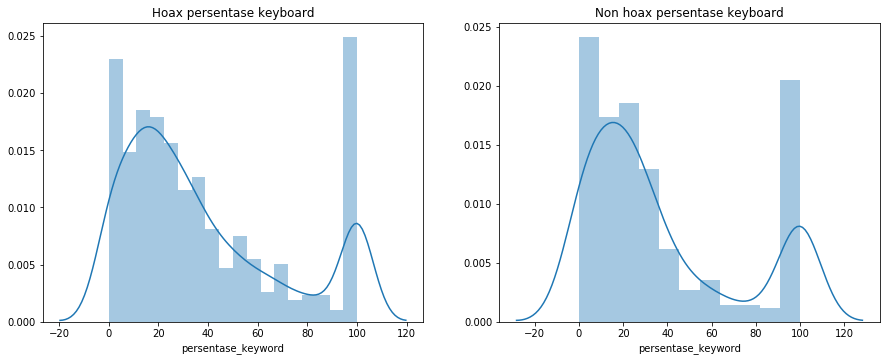

In [31]:
f, ax = plt.subplots(1, 2, figsize=(15, 5.5))
ax[0].set_title('Hoax persentase keyboard')
sns.distplot(hoax['persentase_keyword'], ax=ax[0])

ax[1].set_title('Non hoax persentase keyboard')
sns.distplot(non_hoax['persentase_keyword'], ax=ax[1])

plt.show()

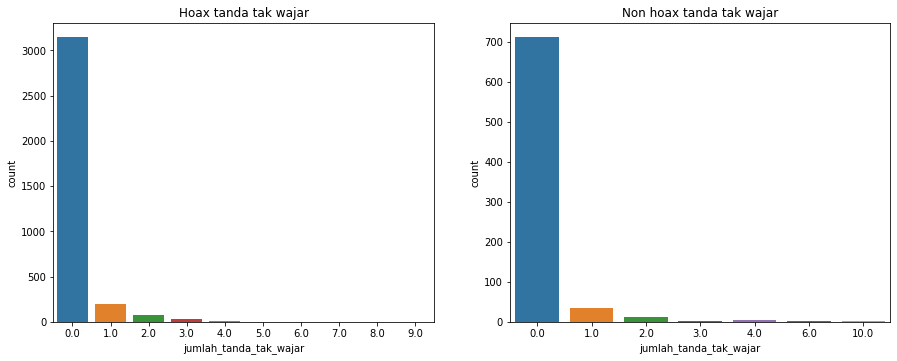

In [32]:
f, ax = plt.subplots(1, 2, figsize=(15, 5.5))
ax[0].set_title('Hoax tanda tak wajar')
sns.countplot(x=hoax['jumlah_tanda_tak_wajar'], data=hoax, ax=ax[0])

ax[1].set_title('Non hoax tanda tak wajar')
sns.countplot(x=non_hoax['jumlah_tanda_tak_wajar'], data=non_hoax, ax=ax[1])

plt.show()

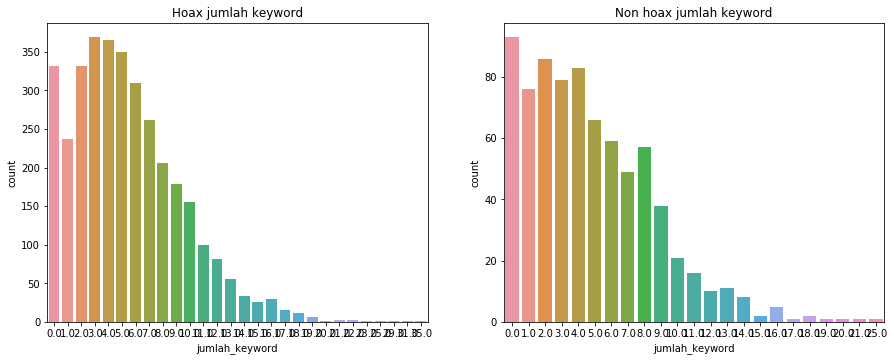

In [33]:
f, ax = plt.subplots(1, 2, figsize=(15, 5.5))
ax[0].set_title('Hoax jumlah keyword')
sns.countplot(x=hoax['jumlah_keyword'], data=hoax, ax=ax[0])

ax[1].set_title('Non hoax jumlah keyword')
sns.countplot(x=non_hoax['jumlah_keyword'], data=non_hoax, ax=ax[1])

plt.show()

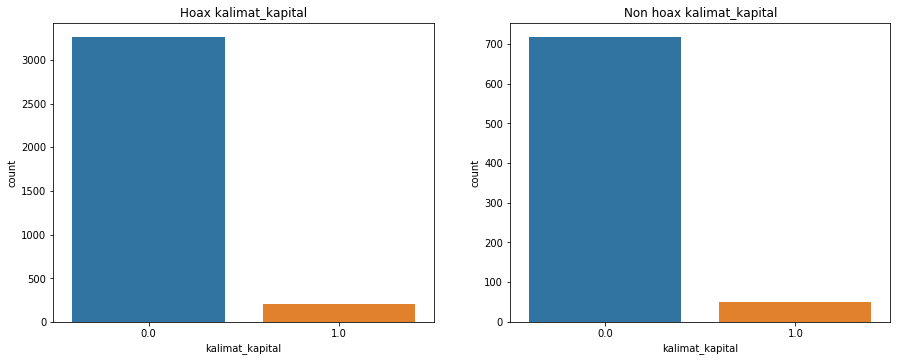

In [34]:
f, ax = plt.subplots(1, 2, figsize=(15, 5.5))
ax[0].set_title('Hoax kalimat_kapital')
sns.countplot(x=hoax['kalimat_kapital'], data=hoax, ax=ax[0])

ax[1].set_title('Non hoax kalimat_kapital')
sns.countplot(x=non_hoax['kalimat_kapital'], data=non_hoax, ax=ax[1])

plt.show()

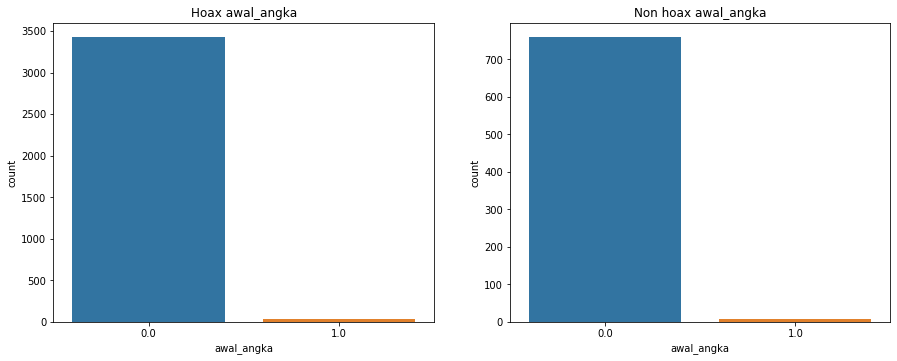

In [35]:
f, ax = plt.subplots(1, 2, figsize=(15, 5.5))
ax[0].set_title('Hoax awal_angka')
sns.countplot(x=hoax['awal_angka'], data=hoax, ax=ax[0])

ax[1].set_title('Non hoax awal_angka')
sns.countplot(x=non_hoax['awal_angka'], data=non_hoax, ax=ax[1])

plt.show()

3. Data Preprocessing (Data Testing)

In [36]:
angka = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
tanda = ['?', '!', '.', ',', ' ']
df_baru_test = pd.DataFrame()
for index, row in df_t_judul.iteritems():
    if row[0] in angka:
        df_baru_test.loc[index, 'awal_angka'] = 1
    elif row[0] not in angka:
        df_baru_test.loc[index, 'awal_angka'] = 0
    temp = 0
    for x in row:
        if x in tanda:
            temp += 1
    jumlah_tanda = temp
    df_baru_test.loc[index, 'jumlah_tanda'] = jumlah_tanda
    
    sentence = row
    sentence = re.sub(r'[^\w\s]', '', sentence)
    words = nltk.word_tokenize(sentence)
    jumlah_huruf = len(words)
    df_baru_test.loc[index, 'jumlah_huruf'] = jumlah_huruf
    if (jumlah_tanda - jumlah_huruf) >= 0:
        df_baru_test.loc[index, 'jumlah_tanda_tak_wajar'] = (jumlah_tanda - jumlah_huruf)
    elif (jumlah_tanda - jumlah_huruf) < 0:
        df_baru_test.loc[index, 'jumlah_tanda_tak_wajar'] = 0
    
    words = [w for w in words if not w in stop_words]
    temp2, temp3 = 0, 0
    for w in words:
        temp3 += 1
        if w.isupper() == True:
            temp2 += 1
    if temp2 == temp3:
        df_baru_test.loc[index, 'kalimat_kapital'] = 1
    elif temp2 != temp3:
        df_baru_test.loc[index, 'kalimat_kapital'] = 0
        
    kata_judul = row
    kata_narasi = df_t_narasi[index]
    kata_judul = re.sub(r'[^\w\s]', '', kata_judul)
    kata_narasi = re.sub(r'[^\w\s]', '', kata_narasi)
    # Tokenization
    kata_judul = nltk.word_tokenize(kata_judul)
    kata_narasi = nltk.word_tokenize(kata_narasi)
    # Menghilangkan stopwords
    kata_judul = [w.lower() for w in kata_judul if not w in stop_words]
    kata_narasi = [w.lower() for w in kata_narasi if not w in stop_words]
    temp4, temp5 = 0, 0
    for w in kata_narasi:
        temp4 += 1
        if w in kata_judul:
            temp5 += 1
    df_baru_test.loc[index, 'jumlah_keyword'] = temp5
    df_baru_test.loc[index, 'persentase_keyword'] = (temp5/temp4)*100
    
    df_baru_test.loc[index, 'label'] = df_t_label[index]

df_baru_test['label'] = df_baru_test['label'].astype(int)

4. Dataframe Baru (Data Testing)

In [37]:
display(df_baru_train.head(2))
display(df_baru_test.head(2))

df_baru_train = df_baru_train.drop(['jumlah_tanda', 'jumlah_huruf', 'jumlah_keyword'], axis=1)
df_baru_test = df_baru_test.drop(['jumlah_tanda', 'jumlah_huruf', 'jumlah_keyword'], axis=1)

display(df_baru_train.head(2))
display(df_baru_test.head(2))

,awal_angka,jumlah_tanda,jumlah_huruf,jumlah_tanda_tak_wajar,kalimat_kapital,jumlah_keyword,persentase_keyword,label
0,0.0,4.0,5.0,0.0,0.0,2.0,2.272727,1
1,0.0,20.0,18.0,2.0,0.0,3.0,17.647059,1


,awal_angka,jumlah_tanda,jumlah_huruf,jumlah_tanda_tak_wajar,kalimat_kapital,jumlah_keyword,persentase_keyword,label
0,0.0,12.0,13.0,0.0,0.0,7.0,33.333333,1
1,0.0,10.0,11.0,0.0,0.0,7.0,100.000000,1


,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword,label
0,0.0,0.0,0.0,2.272727,1
1,0.0,2.0,0.0,17.647059,1


,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword,label
0,0.0,0.0,0.0,33.333333,1
1,0.0,0.0,0.0,100.000000,1


5. Modelling

In [38]:
train_feature = ['awal_angka', 'jumlah_tanda_tak_wajar', 'kalimat_kapital', 'persentase_keyword']

x_train = df_baru_train[train_feature]
y_train = df_baru_train['label']
x_test = df_baru_test[train_feature]
y_test = df_baru_test['label']

a. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(x_train, y_train)
pred = model.predict(x_test)
score = metrics.f1_score(y_test, pred)
print(score)

0.8992974238875878


b. Multinomial Naive Bayes

In [40]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha, tfidf_train, y_train, tfidf_test, y_test):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.f1_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha, x_train, y_train, x_test, y_test))
    print()

Alpha:  0.0
Score:  0.908246225319396

Alpha:  0.1
Score:  0.908246225319396

Alpha:  0.2
Score:  0.908246225319396

Alpha:  0.30000000000000004
Score:  0.908246225319396

Alpha:  0.4
Score:  0.908246225319396

Alpha:  0.5
Score:  0.908246225319396

Alpha:  0.6000000000000001
Score:  0.908246225319396

Alpha:  0.7000000000000001
Score:  0.908246225319396

Alpha:  0.8
Score:  0.908246225319396

Alpha:  0.9
Score:  0.908246225319396



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


7. Modelling Dataframe TF - IDF

In [41]:
display(tfidf_train_df.head(2))
display(x_train.head(2))
print('tfidf train:', len(tfidf_train_df))
print('x train:', len(x_train))
X_train = pd.concat([tfidf_train_df, x_train], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,2.272727
1,0.0,2.0,0.0,17.647059


tfidf train: 4231
x train: 4231


In [42]:
display(X_train.head(2))

,0,1,2,3,4,5,6,7,8,9,...,21186,21187,21188,21189,21190,21191,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.272727
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17.647059


In [43]:
display(tfidf_test_df.head(2))
display(x_test.head(2))
print('tfidf test:', len(tfidf_test_df))
print('x test:', len(x_test))
X_test = pd.concat([tfidf_test_df, x_test], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,33.333333
1,0.0,0.0,0.0,100.000000


tfidf test: 470
x test: 470


In [44]:
display(X_train.head(2))
display(X_test.head(2))

,0,1,2,3,4,5,6,7,8,9,...,21186,21187,21188,21189,21190,21191,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.272727
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17.647059


,0,1,2,3,4,5,6,7,8,9,...,21186,21187,21188,21189,21190,21191,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000


In [45]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha, tfidf_train, y_train, tfidf_test, y_test):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.f1_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha, X_train, y_train, X_test, y_test))

Alpha:  0.0


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.9025270758122744
Alpha:  0.1
Score:  0.9260143198090692
Alpha:  0.2
Score:  0.9153754469606674
Alpha:  0.30000000000000004
Score:  0.9119047619047618
Alpha:  0.4
Score:  0.9097387173396674
Alpha:  0.5
Score:  0.9097387173396674
Alpha:  0.6000000000000001
Score:  0.9082240762812873
Alpha:  0.7000000000000001
Score:  0.9069212410501194
Alpha:  0.8
Score:  0.9071428571428571
Alpha:  0.9
Score:  0.9058402860548271


Random Forest 

In [46]:
#RF untuk 

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)
pred_u = model.predict(X_test)
score = metrics.f1_score(y_test, pred_u)
print(score)

0.9489051094890512


In [47]:
model2 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model2.fit(tfidf_train_df, y_train)
pred = model2.predict(tfidf_test_df)
score = metrics.f1_score(y_test, pred)
print(score)

0.9477521263669502


In [48]:
model3 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model3.fit(tfidf_train, y_train)
pred = model3.predict(tfidf_test)
score = metrics.f1_score(y_test, pred)
print(score)

0.9466019417475727
